 **Logistic Regression**

We'll be try to predict a classification- survival or deceased using titanic dataset. Let's begin our understanding of implementing Logistic Regression for classification.

When we come across a new classification problem, the first algorithm that may come across in our mind is Logistic Regression. It is a supervised learning classification algorithm which is used to predict observations to a discrete set of classes. It is used to classify observations into different categories. Hence, its output is discrete in nature. It is one of the most simple, straightforward and versatile classification algorithms which is used to solve classification problems.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt;
import seaborn as sns
%matplotlib inline

This dataset is taken from kaggle's titanic survival prediction competition.

In [ ]:
df = pd.read_csv('sample_data/train_titanic_data.csv')

In [ ]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
df.shape

(891, 12)

Here we have 891 rows and 12 columns

# Columns Overview

**PassengerId** is the unique id of the row and it doesn't have any effect on target

**Survived** is the target variable we are trying to predict (0 or 1):<br>
1 = Survived <br>
0 = Not Survived

**Pclass (Passenger Class)** is the socio-economic status of the passenger and it is a categorical ordinal feature which has 3 unique values (1, 2 or 3):
1 = Upper Class<br>
2 = Middle Class<br>
3 = Lower Class <br>
#### Name, Sex and Age are self-explanatory
**SibSp** is the total number of the passengers' siblings and spouse <br>
**Parch** is the total number of the passengers' parents and children <br>
**Ticket** is the ticket number of the passenger <br>
**Fare** is the passenger fare <br>
**Cabin** is the cabin number of the passenger <br>
**Embarked** is port of embarkation and it is a categorical feature which has 3 unique values (C, Q or S): <br>
C = Cherbourg <br>
Q = Queenstown <br>
S = Southampton <br>

In [ ]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Missing Data

We can find which column has null values.

In [ ]:
df.isnull().sum().sort_values(ascending=False)

Cabin          687
Age            177
Embarked         2
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
SibSp            0
Parch            0
Ticket           0
Fare             0
dtype: int64

Here We are creating a simple heatmap to see where we are missing data!

<Axes: >

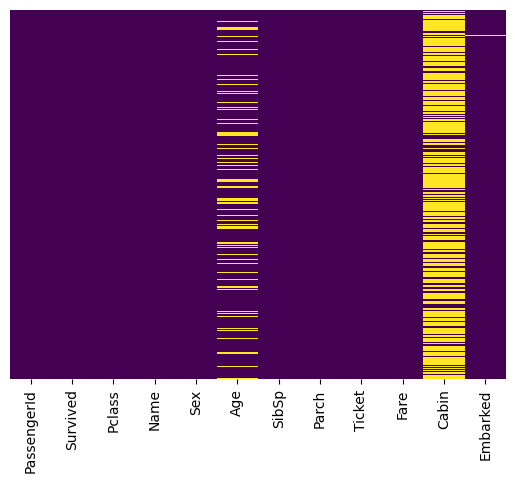

In [ ]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

Around 20 percent of the Age data is missing. The proportion of Age missing is small enough for reasonable replacement with some form of imputation. But in the Cabin column, it looks like we are missing too much of the data to do something useful. We'll probably drop this later.

<Axes: xlabel='Survived', ylabel='count'>

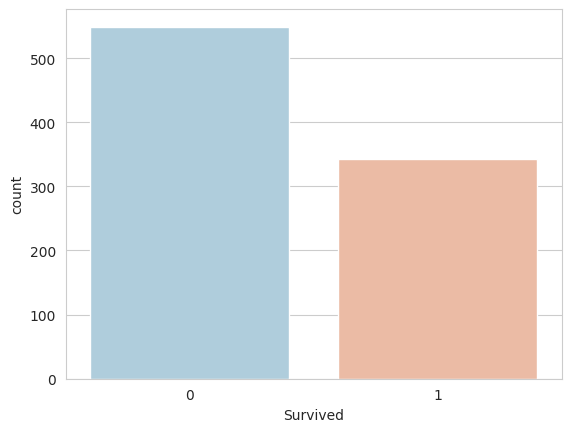

In [ ]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',data=df,palette='RdBu_r', hue='Survived', legend=False)

Above 0 for not-survived and 1 for survived

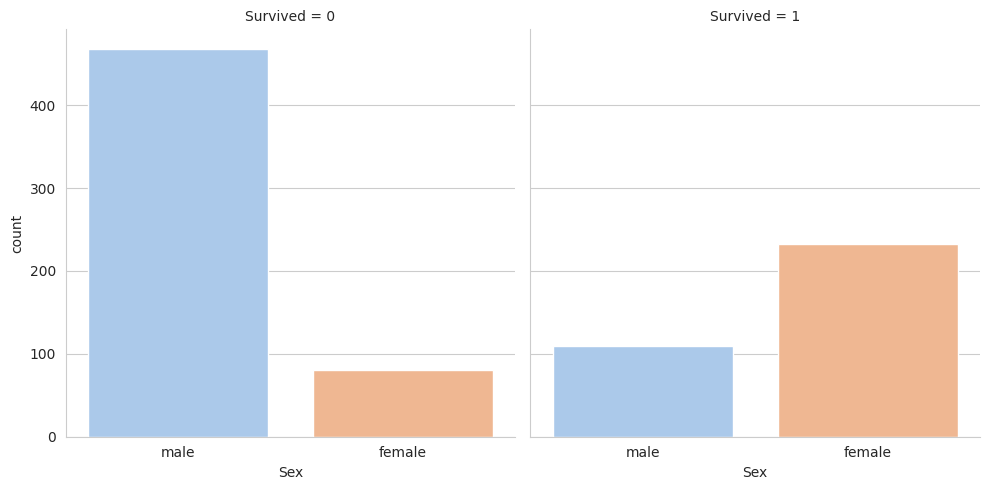

In [ ]:
sns.catplot(x="Sex", col = 'Survived', data=df, kind = 'count', palette='pastel', hue='Sex')

Here more female are survived while more male are not-survived, strange.

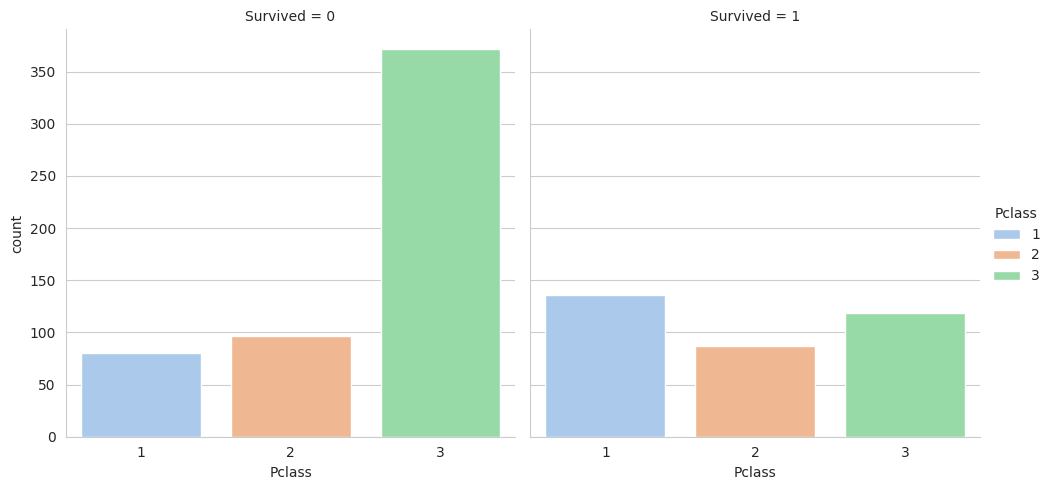

In [ ]:
sns.catplot(x="Pclass", col = 'Survived', data=df, kind = 'count', palette='pastel', hue='Pclass')

From above it looks like most damage caused to Pclass 3.

<Axes: >

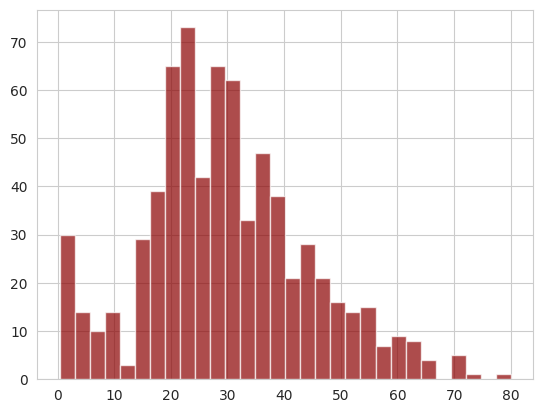

In [ ]:
df['Age'].hist(bins=30,color='darkred',alpha=0.7)

Most of the people were from age group 15 to 45.

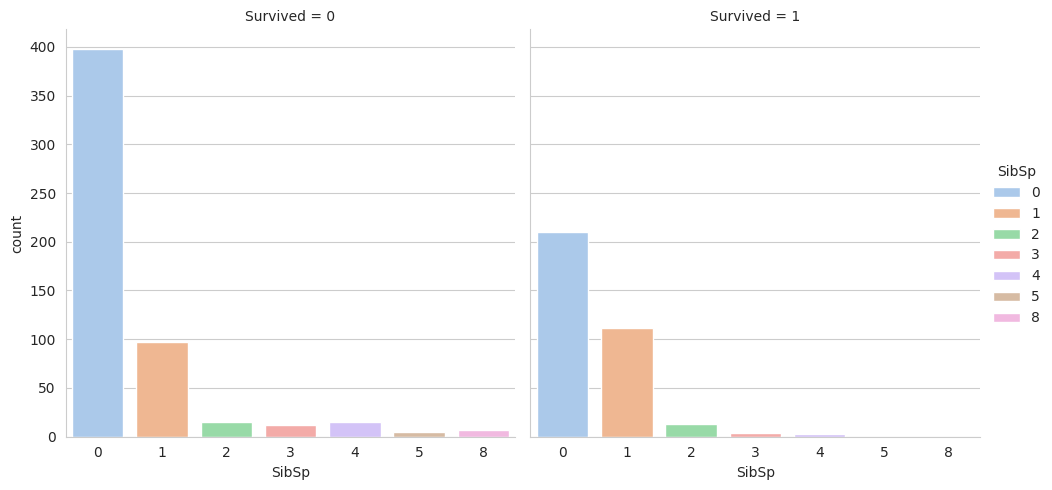

In [ ]:
sns.catplot(x="SibSp", col = 'Survived', data=df, kind = 'count', palette='pastel', hue='SibSp')

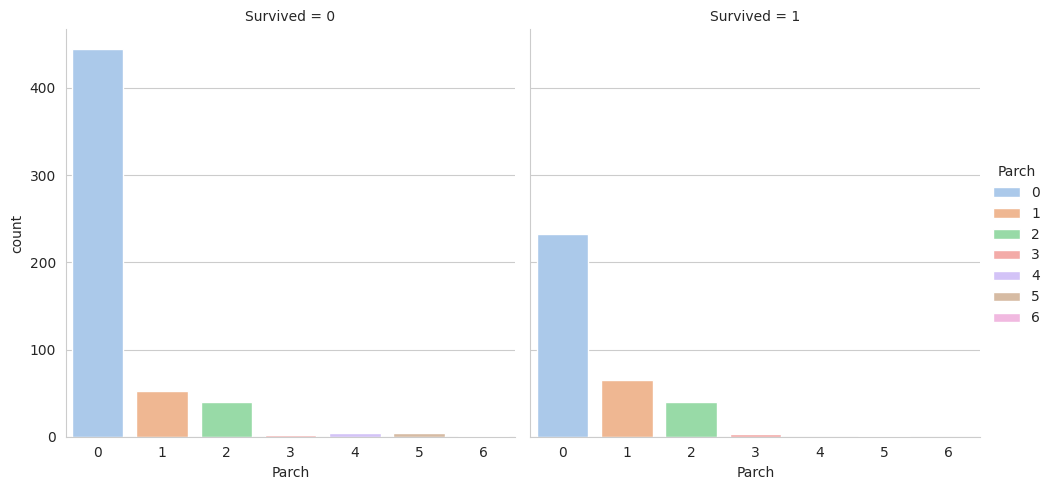

In [ ]:
sns.catplot(x="Parch", col = 'Survived', data=df, kind = 'count', palette='pastel', hue='Parch')

<Axes: >

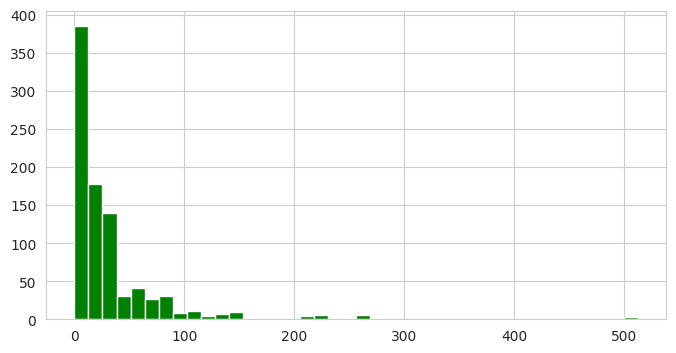

In [ ]:
df['Fare'].hist(color='green',bins=40,figsize=(8,4))


Data Cleaning

We will fill in missing age data instead of just dropping the missing age data rows. One way to do this is by filling in the mean age of all the passengers (imputation). However we can be smarter about this and check the average age by passenger class. For example:

<Axes: xlabel='Pclass', ylabel='Age'>

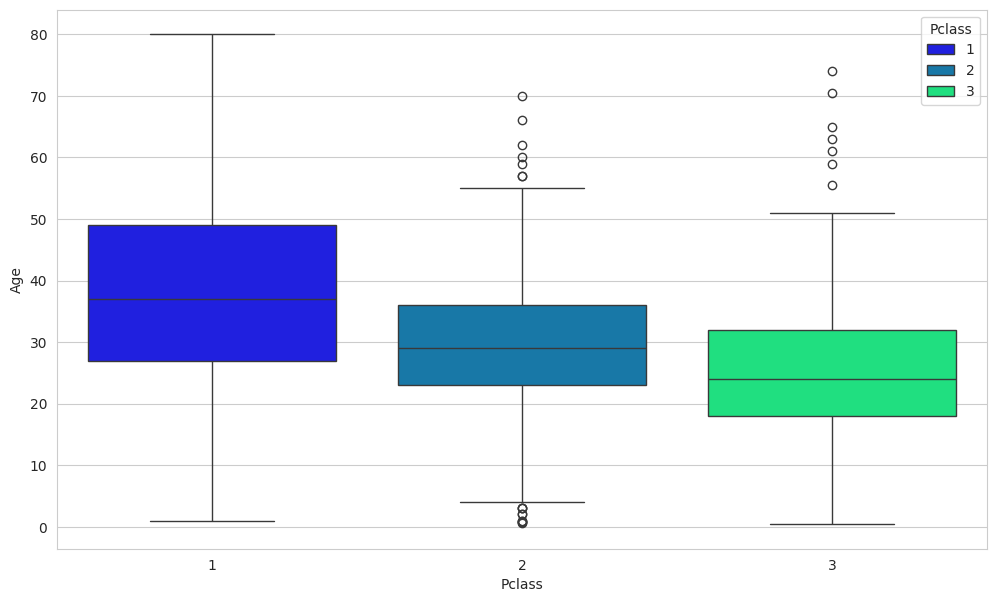

In [ ]:
plt.figure(figsize=(12, 7))
sns.boxplot(x='Pclass',y='Age',data=df,palette='winter', hue='Pclass')

We can see the wealthier passengers in the higher classes tend to be older. We'll use these average age values to impute based on Pclass for Age.

In [ ]:
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]

    if pd.isnull(Age):

        if Pclass == 1:
            return 37

        elif Pclass == 2:
            return 29

        else:
            return 24

    else:
        return Age

In [ ]:
df['Age'] = df[['Age','Pclass']].apply(impute_age,axis=1)

In [ ]:
df['Age'].isnull().any()

False

In [ ]:
df['Embarked'] = df['Embarked'].fillna('S')

Now let's check that heat map again

<Axes: >

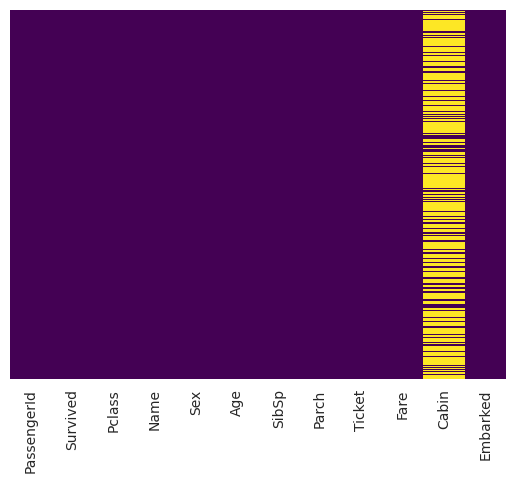

In [ ]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

Now we will drop the Cabin column and the row in Embarked that is NaN.

In [ ]:
df.drop('Cabin',axis=1,inplace=True)

In [ ]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked'],
      dtype='object')

In [ ]:
df['Embarked'].isnull().sum()

0

In [ ]:
df.dropna(inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


Converting Categorical Features

We will need to convert categorical features to dummy variables using pandas. Otherwise our machine learning algorithm won't be able to directly take in those features as inputs.

In [ ]:
sex = pd.get_dummies(df['Sex'],drop_first=True, dtype=int)
embark = pd.get_dummies(df['Embarked'],drop_first=True, dtype=int)

In [ ]:
embark.head()

,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1


Since columns 'PassengerId', 'Name', 'Ticket' does not have any impact on dataset, so will remove them. And 'Sex', 'Embarked' are categorial features, so we will encode them using oandas get_dummy method.

In [ ]:
df.drop(['PassengerId','Sex','Embarked','Name','Ticket'],axis=1,inplace=True)

In [ ]:
df = pd.concat([df,sex,embark],axis=1)

In [ ]:
df.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,0,3,22.0,1,0,7.2500,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,1
4,0,3,35.0,0,0,8.0500,1,0,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Age       891 non-null    float64
 3   SibSp     891 non-null    int64  
 4   Parch     891 non-null    int64  
 5   Fare      891 non-null    float64
 6   male      891 non-null    int64  
 7   Q         891 non-null    int64  
 8   S         891 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 62.8 KB


In [ ]:
df.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.066409,0.523008,0.381594,32.204208,0.647587,0.086420,0.725028
std,0.486592,0.836071,13.244532,1.102743,0.806057,49.693429,0.477990,0.281141,0.446751
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400,0.000000,0.000000,0.000000
50%,0.000000,3.000000,26.000000,0.000000,0.000000,14.454200,1.000000,0.000000,1.000000
75%,1.000000,3.000000,37.000000,1.000000,0.000000,31.000000,1.000000,0.000000,1.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200,1.000000,1.000000,1.000000


Correlation provides how each column is realted to other column.

In [ ]:
df.corr()

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
Survived,1.000000,-0.338481,-0.047255,-0.035322,0.081629,0.257307,-0.543351,0.003650,-0.149683
Pclass,-0.338481,1.000000,-0.408487,0.083081,0.018443,-0.549500,0.131900,0.221009,0.074053
Age,-0.047255,-0.408487,1.000000,-0.243526,-0.171095,0.123784,0.078421,-0.081658,0.015733
SibSp,-0.035322,0.083081,-0.243526,1.000000,0.414838,0.159651,-0.114631,-0.026354,0.068734
Parch,0.081629,0.018443,-0.171095,0.414838,1.000000,0.216225,-0.245489,-0.081228,0.060814
Fare,0.257307,-0.549500,0.123784,0.159651,0.216225,1.000000,-0.182333,-0.117216,-0.162184
male,-0.543351,0.131900,0.078421,-0.114631,-0.245489,-0.182333,1.000000,-0.074115,0.119224
Q,0.003650,0.221009,-0.081658,-0.026354,-0.081228,-0.117216,-0.074115,1.000000,-0.499421
S,-0.149683,0.074053,0.015733,0.068734,0.060814,-0.162184,0.119224,-0.499421,1.000000


In [ ]:
from sklearn.model_selection import train_test_split

Our data is ready for our model.

###Building a Logistic Regression model

Let's start by splitting our data into a training set and test set.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df.drop(['Survived'],axis=1),
                                                    df['Survived'], test_size=0.10,
                                                    random_state=101)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

In [ ]:
logreg_pipe = make_pipeline(StandardScaler(), LogisticRegression())


In [ ]:
logreg_pipe.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('logisticregression', LogisticRegression())])

In [ ]:
print(f'Training set score: {logreg_pipe.score(X_train, y_train)}')
print(f'Test set score: {logreg_pipe.score(X_test, y_test)}')

Training set score: 0.8114856429463171
Test set score: 0.8111111111111111


The training-set accuracy score is 0.81148 while the test-set accuracy to be 0.81111. These two values are quite comparable. So, there is no question of overfitting.

In [ ]:
# Now using test data for prediction
predictions = logreg_pipe.predict(X_test)

###Evaluation

We can check precision,recall,f1-score using classification report.

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

In [ ]:
confusion_matrix(y_test, predictions)

array([[46,  5],
       [12, 27]])

In [ ]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.79      0.90      0.84        51
           1       0.84      0.69      0.76        39

    accuracy                           0.81        90
   macro avg       0.82      0.80      0.80        90
weighted avg       0.82      0.81      0.81        90



Let's tune C parameter mannually

In [ ]:
# fit the Logsitic Regression model with C=100
logreg100 = LogisticRegression(C=100, random_state=0, max_iter=500)

logreg100.fit(X_train, y_train)

LogisticRegression(C=100, max_iter=500, random_state=0)

In [ ]:
print(f'Training set score: {logreg100.score(X_train, y_train)}')
print(f'Test set score: {logreg100.score(X_test, y_test)}')

Training set score: 0.8102372034956304
Test set score: 0.8111111111111111


Now, I will investigate, what happens if we use more regularized model than the default value of C=1, by setting C=0.01.

In [ ]:
logreg001 = LogisticRegression(C=0.01, random_state=0)

logreg001.fit(X_train, y_train)

LogisticRegression(C=0.01, random_state=0)

In [ ]:
print(f'Training set score: {logreg001.score(X_train, y_train)}')
print(f'Test set score: {logreg001.score(X_test, y_test)}')

Training set score: 0.7453183520599251
Test set score: 0.6888888888888889


So, if we use more regularized model by setting C=0.01, then both the training and test set accuracy decrease relatiev to the default parameters.

###Hyperparameter Optimization using GridSearch CV

In [ ]:
from sklearn.model_selection import GridSearchCV

parameters = [{'logisticregression__penalty':['l2']},
              {'logisticregression__C':[1, 10, 100, 1000]}]

grid_search = GridSearchCV( estimator = logreg_pipe,
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 5,
                           verbose=0 )

grid_search.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('standardscaler', StandardScaler()),
                                       ('logisticregression',
                                        LogisticRegression())]),
             param_grid=[{'logisticregression__penalty': ['l2']},
                         {'logisticregression__C': [1, 10, 100, 1000]}],
             scoring='accuracy')

In [ ]:
print(f'GridSearch CV best score : {grid_search.best_score_}')

print(f'\nParameters that give the best results : {grid_search.best_params_}')

print(f'\nEstimator that was chosen by the search :\n\n {grid_search.best_estimator_}')

GridSearch CV best score : 0.7965372670807452

Parameters that give the best results : {'logisticregression__penalty': 'l2'}

Estimator that was chosen by the search :

 Pipeline(steps=[('standardscaler', StandardScaler()),
                ('logisticregression', LogisticRegression())])


In [ ]:
print(f'GridSearch CV score on test set: {grid_search.score(X_test, y_test)}')

GridSearch CV score on test set: 0.8111111111111111


That's it for the Logistic Regression at basic level